<a href="https://colab.research.google.com/github/lonen8188/AIStudy24/blob/master/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데 근데 결국 테스트세트로 평가를하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다.
테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한 테스트세트를 사용하지 말아야 한다.
모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.

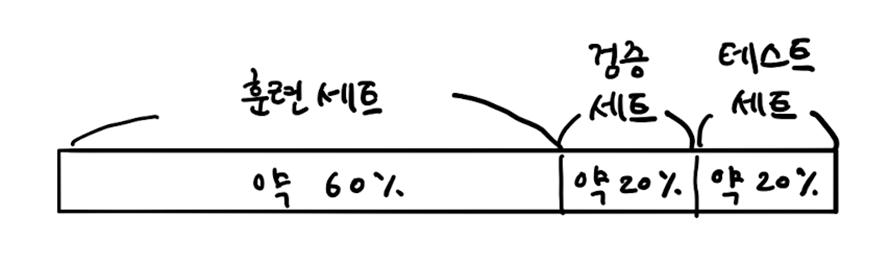

In [ ]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나눈는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# 훈련세트와 테스트 세트를 나눔
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) # 20%
# 원본데이터 6497개 20% = train(5197) , test(1300)

#검증세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)
# 원래 5197개였던 훈련세트가 4157개로 줄고, 검증세트가 1040개가 됨

(4157, 3) (1040, 3)


In [2]:
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가함.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) # 훈련

print(dt.score(sub_input, sub_target)) # 출력 99.71%(과대적합)
print(dt.score(val_input, val_target)) # 검증 86.44%
# 매개변수를 바꿔서 더 좋은 모델을 찾아야 함

0.9971133028626413
0.864423076923077


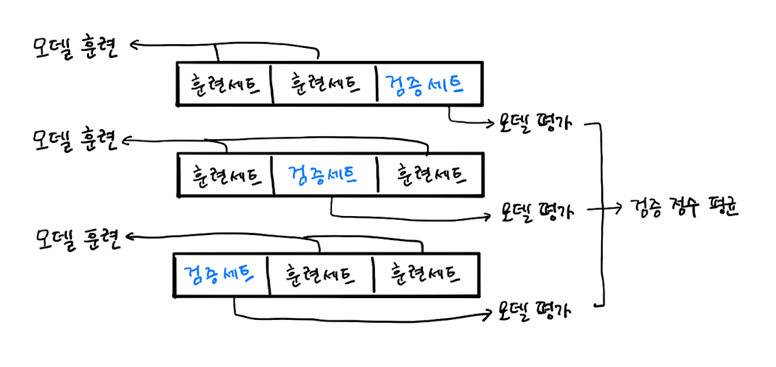

In [ ]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음. (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복함
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

In [3]:
from sklearn.model_selection import cross_validate

# 평가할 모델 객체를 첫번째 매개변수로 전달함(직접 검증세트를 떼지않고 훈련세트 전체를 전달함)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)
print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환함

{'fit_time': array([0.00975204, 0.00847673, 0.00859928, 0.00895834, 0.00891972]), 'score_time': array([0.00164318, 0.00137901, 0.00128341, 0.0013752 , 0.00141358]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
# {'fit_time': array([0.00975204, 0.00847673, 0.00859928, 0.00895834, 0.00891972]),
#  'score_time': array([0.00164318, 0.00137901, 0.00128341, 0.0013752 , 0.00141358]),
#  'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [4]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score 이름이지만 검증폴드의 점수임
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. 85.53%

0.855300214703487


In [5]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [6]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719
